<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Homework7Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
df = pd.read_excel('https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls')
df.head()

,Gender,Amount purchased,Frequency,Last purchase,First purchase,P_Child,P_Youth,P_Cook,P_DIY,P_Art,Staus,Choice
0,1,113,8,1,8,0,1,0,0,0,Training,Y
1,1,418,6,11,66,0,2,3,2,3,Training,Y
2,1,336,18,6,32,2,0,1,1,2,Training,Y
3,1,180,16,5,42,2,0,0,1,1,Training,Y
4,0,320,2,3,18,0,0,0,1,2,Training,Y


In [ ]:
# prompt: Using dataframe df: convert choice to 0(N)and 1(Y)

# Convert 'Choice' column to numerical values (0 for 'N', 1 for 'Y')
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})


In [ ]:
# prompt: Using dataframe df: Use choice variable as dependent variable. Construct the logistic model by using the training data when the status variables having the training value.

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame
# Filter the DataFrame for training data
training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']
# Define features (X) and target variable (y)
X_train = training_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_train = training_data['Choice']
X_test = test_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_test = test_data['Choice']

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Now you can use the 'model' to make predictions on new data
# Example:
# new_data = pd.DataFrame({'Gender': [0], 'Amount purchased': [200], 'Frequency': [5], ...})
# predictions = model.predict(new_data)
# Or predict probabilities:
# probabilities = model.predict_proba(new_data)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 400, number of negative: 1200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
Performance Metrics:
--------------------------------------------------

Logistic Regression:
Accuracy: 0.8917
Precision: 0.3846
Recall: 0.3676
AUC Score: 0.8005
Confusion Matrix:
[[1976  120]
 [ 129   75]]

Decision Tree:
Accuracy: 0.7783
Precision: 0.1799
Recall: 0.4216
AUC Score: 0.6160
Confusion Matrix:
[[1704  392]
 [ 118   86]]

Random Forest:
Accuracy: 0.853

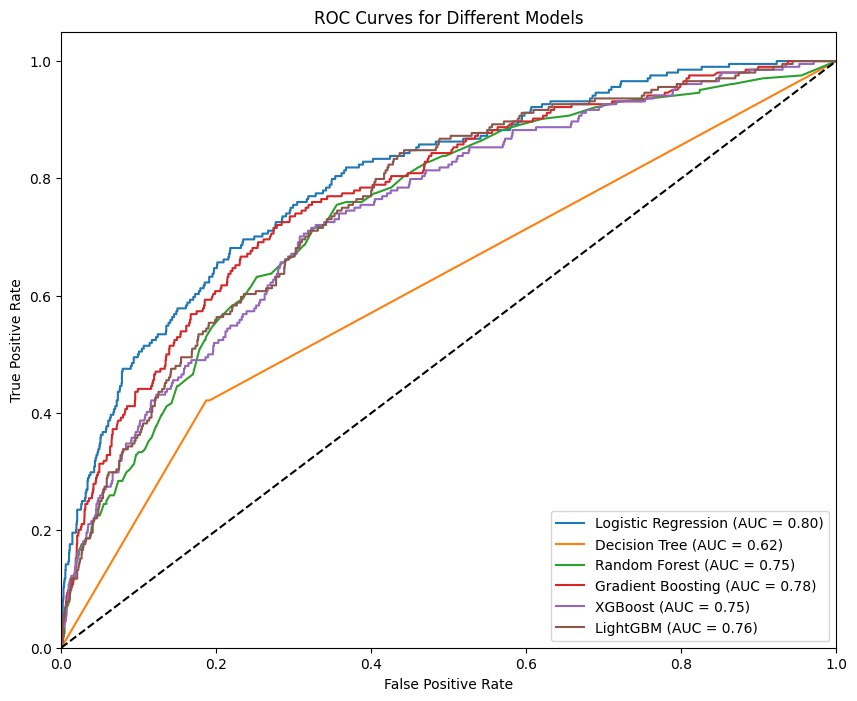


Best Performing Models:
--------------------------------------------------
Best Accuracy: Logistic Regression (0.8917)
Best Precision: Logistic Regression (0.3846)
Best Recall: Decision Tree (0.4216)
Best AUC: Logistic Regression (0.8005)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the structure you provided
# Note: I'll assume categorical variables like 'Gender' are already encoded numerically

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Dictionary to store results
results = {}
y_pred_dict = {}
y_prob_dict = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # Store predictions
    y_pred_dict[name] = y_pred
    y_prob_dict[name] = y_prob

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix,
        'AUC': roc_auc,
        'fpr': fpr,
        'tpr': tpr
    }

# Print results
print("Performance Metrics:")
print("-" * 50)
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"AUC Score: {metrics['AUC']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, metrics in results.items():
    plt.plot(metrics['fpr'], metrics['tpr'], label=f'{name} (AUC = {metrics["AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

# Find best performing model for each metric
metrics_to_compare = ['Accuracy', 'Precision', 'Recall', 'AUC']
best_models = {}

for metric in metrics_to_compare:
    best_model = max(results.items(), key=lambda x: x[1][metric])
    best_models[metric] = (best_model[0], best_model[1][metric])

print("\nBest Performing Models:")
print("-" * 50)
for metric, (model_name, value) in best_models.items():
    print(f"Best {metric}: {model_name} ({value:.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


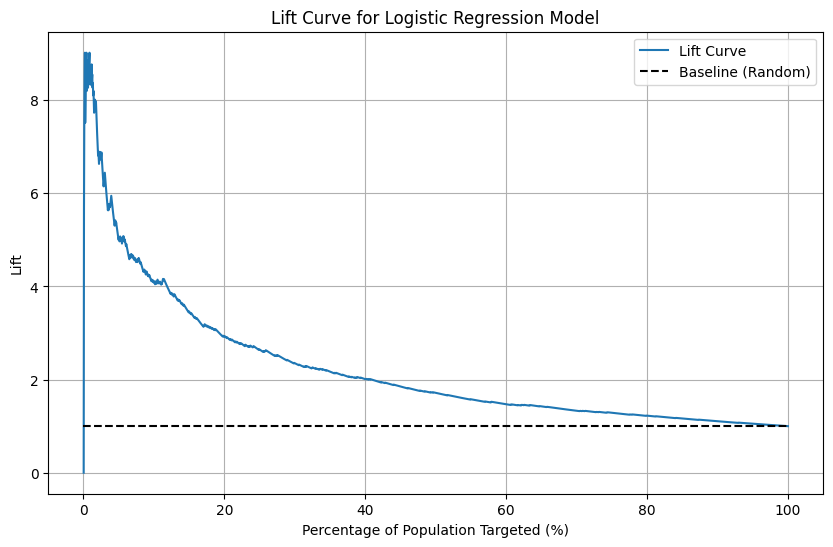

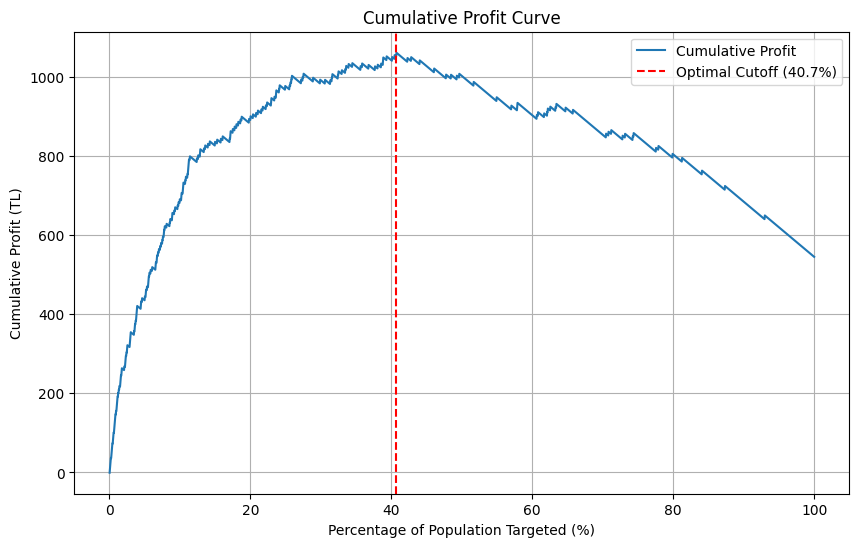

Analysis Results:
Total test customers: 2300
Total positives in test set: 204
Optimal percentage to target: 40.7%
Number of customers to target: 1680
Maximum profit achievable: 1060.95 TL
Profit per customer targeted: 0.63 TL

Characteristics of target customers (averages):
Gender                0.617262
Amount purchased    202.119048
Frequency            10.601190
Last purchase         2.994643
First purchase       19.821429
P_Child               0.682738
P_Youth               0.335119
P_Cook                0.663095
P_DIY                 0.363690
P_Art                 0.422024
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming your test_data is already defined from previous context
# Fit logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Get probability predictions for test data
test_probs = lr_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Create a dataframe with actual outcomes and predicted probabilities
lift_df = pd.DataFrame({
    'Actual': y_test,
    'Probability': test_probs
})

# Sort by predicted probability in descending order
lift_df = lift_df.sort_values('Probability', ascending=False)

# Calculate cumulative metrics
lift_df['Cumulative_Actual'] = lift_df['Actual'].cumsum()
total_positives = lift_df['Actual'].sum()
lift_df['Cumulative_Percent_Positives'] = lift_df['Cumulative_Actual'] / total_positives
lift_df['Percent_Population'] = (np.arange(1, len(lift_df) + 1) / len(lift_df))

# Calculate baseline (random selection)
baseline = total_positives / len(lift_df)

# Calculate lift
lift_df['Lift'] = lift_df['Cumulative_Percent_Positives'] / lift_df['Percent_Population']

# Calculate profit metrics
profit_per_sale = 10  # TL
cost_per_mail = 0.65  # TL
lift_df['Cumulative_Profit'] = (lift_df['Cumulative_Actual'] * profit_per_sale) - (np.arange(1, len(lift_df) + 1) * cost_per_mail)

# Find optimal cutoff (maximum profit)
optimal_idx = lift_df['Cumulative_Profit'].idxmax()
optimal_profit = lift_df['Cumulative_Profit'].max()
optimal_percent = lift_df.loc[optimal_idx, 'Percent_Population'] * 100

# Plot Lift Curve
plt.figure(figsize=(10, 6))
plt.plot(lift_df['Percent_Population'] * 100, lift_df['Lift'], label='Lift Curve')
plt.plot([0, 100], [1, 1], 'k--', label='Baseline (Random)')
plt.xlabel('Percentage of Population Targeted (%)')
plt.ylabel('Lift')
plt.title('Lift Curve for Logistic Regression Model')
plt.legend()
plt.grid(True)
plt.show()

# Plot Cumulative Profit
plt.figure(figsize=(10, 6))
plt.plot(lift_df['Percent_Population'] * 100, lift_df['Cumulative_Profit'], label='Cumulative Profit')
plt.axvline(x=optimal_percent, color='r', linestyle='--', label=f'Optimal Cutoff ({optimal_percent:.1f}%)')
plt.xlabel('Percentage of Population Targeted (%)')
plt.ylabel('Cumulative Profit (TL)')
plt.title('Cumulative Profit Curve')
plt.legend()
plt.grid(True)
plt.show()

# Determine target customers
target_customers = lift_df.index[:optimal_idx + 1]
percent_to_target = optimal_percent

# Print results
print(f"Analysis Results:")
print(f"Total test customers: {len(lift_df)}")
print(f"Total positives in test set: {total_positives}")
print(f"Optimal percentage to target: {optimal_percent:.1f}%")
print(f"Number of customers to target: {len(target_customers)}")
print(f"Maximum profit achievable: {optimal_profit:.2f} TL")
print(f"Profit per customer targeted: {optimal_profit/len(target_customers):.2f} TL")

# Get characteristics of target customers
target_df = test_data.loc[target_customers]
print("\nCharacteristics of target customers (averages):")
print(target_df[['Gender', 'Amount purchased', 'Frequency', 'Last purchase',
                 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']].mean())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


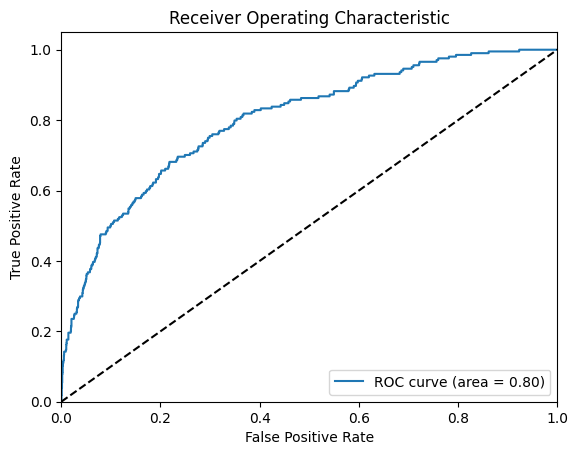

Optimal threshold: 0.1783
Maximum expected profit: 1060.95 TL
Number of customers to target: 937
Percentage of test customers to target: 40.74%


<ipython-input-11-f75c4c648d53>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Probability'] = y_prob
<ipython-input-11-f75c4c648d53>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Should_Target'] = (test_data['Predicted_Probability'] >= optimal_threshold).astype(int)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame


# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Profit calculation
profit_per_sale = 10  # TL
cost_per_mail = 0.65  # TL

# Calculate expected profit for each threshold
profits = []
for threshold in thresholds:
    predicted = (y_prob >= threshold).astype(int)
    tp = np.sum((predicted == 1) & (y_test == 1))  # True positives
    fp = np.sum((predicted == 1) & (y_test == 0))  # False positives

    total_profit = (tp * profit_per_sale) - ((tp + fp) * cost_per_mail)
    profits.append(total_profit)

# Find optimal threshold (maximizes profit)
optimal_idx = np.argmax(profits)
optimal_threshold = thresholds[optimal_idx]
max_profit = profits[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.4f}")
print(f"Maximum expected profit: {max_profit:.2f} TL")

# Determine which customers to target
test_data['Predicted_Probability'] = y_prob
test_data['Should_Target'] = (test_data['Predicted_Probability'] >= optimal_threshold).astype(int)

# Customers to target (sorted by probability)
customers_to_target = test_data[test_data['Should_Target'] == 1].sort_values('Predicted_Probability', ascending=False)

print(f"Number of customers to target: {len(customers_to_target)}")
print(f"Percentage of test customers to target: {len(customers_to_target)/len(test_data):.2%}")

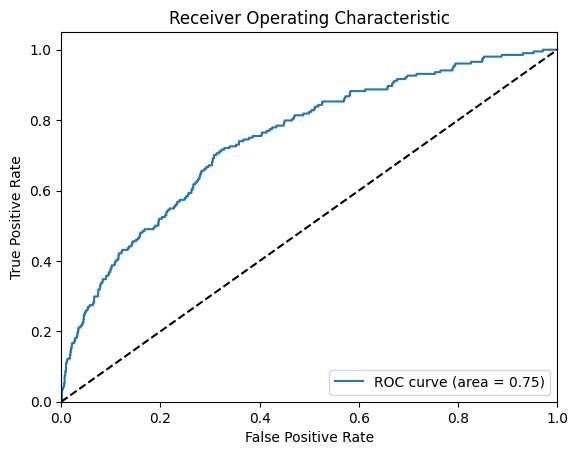

Optimal threshold: 0.1413
Maximum expected profit: 927.25 TL
Number of customers to target: 835
Percentage of test customers to target: 36.30%


<ipython-input-12-cc53a0ee2bf9>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Probability'] = y_prob
<ipython-input-12-cc53a0ee2bf9>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Should_Target'] = (test_data['Predicted_Probability'] >= optimal_threshold).astype(int)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame


# Train logistic regression model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Profit calculation
profit_per_sale = 10  # TL
cost_per_mail = 0.65  # TL

# Calculate expected profit for each threshold
profits = []
for threshold in thresholds:
    predicted = (y_prob >= threshold).astype(int)
    tp = np.sum((predicted == 1) & (y_test == 1))  # True positives
    fp = np.sum((predicted == 1) & (y_test == 0))  # False positives

    total_profit = (tp * profit_per_sale) - ((tp + fp) * cost_per_mail)
    profits.append(total_profit)

# Find optimal threshold (maximizes profit)
optimal_idx = np.argmax(profits)
optimal_threshold = thresholds[optimal_idx]
max_profit = profits[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.4f}")
print(f"Maximum expected profit: {max_profit:.2f} TL")

# Determine which customers to target
test_data['Predicted_Probability'] = y_prob
test_data['Should_Target'] = (test_data['Predicted_Probability'] >= optimal_threshold).astype(int)

# Customers to target (sorted by probability)
customers_to_target = test_data[test_data['Should_Target'] == 1].sort_values('Predicted_Probability', ascending=False)

print(f"Number of customers to target: {len(customers_to_target)}")
print(f"Percentage of test customers to target: {len(customers_to_target)/len(test_data):.2%}")

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 400, number of negative: 1200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
Training KNN...
Training MLP...
Training SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance Metrics:
--------------------------------------------------

Logistic Regression:
Accuracy: 0.8917
Precision: 0.3846
Recall: 0.3676
AUC Score: 0.8005
Confusion Matrix:
[[1976  120]
 [ 129   75]]

Decision Tree:
Accuracy: 0.7783
Precision: 0.1799
Recall: 0.4216
AUC Score: 0.6160
Confusion Matrix:
[[1704  392]
 [ 118   86]]

Random Forest:
Accuracy: 0.8535
Precision: 0.2452
Recall: 0.3137
AUC Score: 0.7458
Confusion Matrix:
[[1899  197]
 [ 140   64]]

Gradient Boosting:
Accuracy: 0.8887
Precision: 0.3571
Recall: 0.3186
AUC Score: 0.7765
Confusion Matrix:
[[1979  117]
 [ 139   65]]

XGBoost:
Accuracy: 0.8530
Precision: 0.2705
Recall: 0.3873
AUC Score: 0.7454
Confusion Matrix:
[[1883  213]
 [ 125   79]]

LightGBM:
Accuracy: 0.8574
Precision: 0.2669
Recall: 0.3480
AUC Score: 0.7599
Confusion Matrix:
[[1901  195]
 [ 133   71]]

KNN:
Accuracy: 0.8343
Precision: 0.1031
Recall: 0.1127
AUC Score: 0.5526
Confusion Matrix:
[[1896  200]
 [ 181   23]]

MLP:
Accuracy: 0.9009
Precision: 0

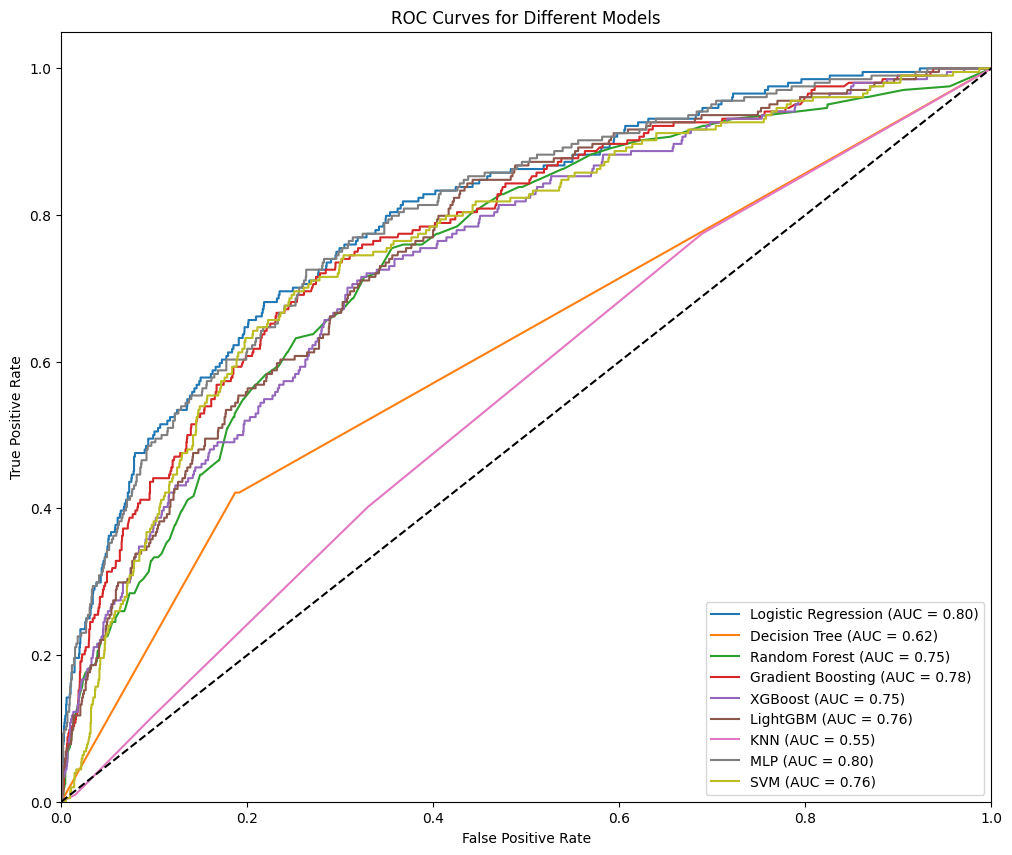


Best Performing Models:
--------------------------------------------------
Best Accuracy: SVM (0.9113)
Best Precision: MLP (0.4200)
Best Recall: Decision Tree (0.4216)
Best AUC: Logistic Regression (0.8005)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the structure you provided
# Note: I'll assume categorical variables like 'Gender' are already encoded numerically
KNNp: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
svmp:{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42, max_iter=1000),
    'SVM': SVC(probability=True, random_state=42,)  # probability=True for ROC curve
}

# Dictionary to store results
results = {}
y_pred_dict = {}
y_prob_dict = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    try:
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class

        # Store predictions
        y_pred_dict[name] = y_pred
        y_prob_dict[name] = y_prob

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Store results
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'Confusion Matrix': conf_matrix,
            'AUC': roc_auc,
            'fpr': fpr,
            'tpr': tpr
        }
    except Exception as e:
        print(f"Error with {name}: {str(e)}")
        results[name] = None

# Print results
print("\nPerformance Metrics:")
print("-" * 50)
for name, metrics in results.items():
    if metrics is not None:
        print(f"\n{name}:")
        print(f"Accuracy: {metrics['Accuracy']:.4f}")
        print(f"Precision: {metrics['Precision']:.4f}")
        print(f"Recall: {metrics['Recall']:.4f}")
        print(f"AUC Score: {metrics['AUC']:.4f}")
        print("Confusion Matrix:")
        print(metrics['Confusion Matrix'])

# Plot ROC curves
plt.figure(figsize=(12, 10))
for name, metrics in results.items():
    if metrics is not None:
        plt.plot(metrics['fpr'], metrics['tpr'], label=f'{name} (AUC = {metrics["AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

# Find best performing model for each metric
metrics_to_compare = ['Accuracy', 'Precision', 'Recall', 'AUC']
best_models = {}

for metric in metrics_to_compare:
    valid_models = {k: v for k, v in results.items() if v is not None}
    best_model = max(valid_models.items(), key=lambda x: x[1][metric])
    best_models[metric] = (best_model[0], best_model[1][metric])

print("\nBest Performing Models:")
print("-" * 50)
for metric, (model_name, value) in best_models.items():
    print(f"Best {metric}: {model_name} ({value:.4f})")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler  # Important for SVM and KNN

# Scale features (critical for SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 1. SVM Tuning
# ======================
svm_params = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]    # Kernel coefficient (for rbf/poly)
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42),
                       param_grid=svm_params,
                       cv=3,
                       scoring='roc_auc',
                       n_jobs=-1,
                       verbose=1)

print("Tuning SVM parameters...")
svm_grid.fit(X_train_scaled, y_train)

best_svm = svm_grid.best_estimator_
print(f"\nBest SVM parameters: {svm_grid.best_params_}")
print(f"Best SVM validation AUC: {svm_grid.best_score_:.4f}")

# ======================
# 2. KNN Tuning
# ======================
knn_params = {
    'n_neighbors': range(3, 21, 2),      # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan'] # Distance metric
}

knn_grid = GridSearchCV(KNeighborsClassifier(),
                       param_grid=knn_params,
                       cv=5,
                       scoring='roc_auc',
                       n_jobs=-1,
                       verbose=1)

print("\nTuning KNN parameters...")
knn_grid.fit(X_train_scaled, y_train)

best_knn = knn_grid.best_estimator_
print(f"\nBest KNN parameters: {knn_grid.best_params_}")
print(f"Best KNN validation AUC: {knn_grid.best_score_:.4f}")

# ======================
# Evaluate on Test Data
# ======================
tuned_models = {
    'SVM (tuned)': best_svm,
    'KNN (tuned)': best_knn
}

for name, model in tuned_models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"\n{name} Test Performance:")
    print(f"AUC: {roc_auc:.4f}")
    print(f"Best Parameters: {model.get_params()}")

Tuning SVM parameters...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best SVM parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM validation AUC: 0.7972

Tuning KNN parameters...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
Best KNN validation AUC: 0.7429

SVM (tuned) Test Performance:
AUC: 0.7970
Best Parameters: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}

KNN (tuned) Test Performance:
AUC: 0.7728
Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 400, number of negative: 1200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
Training KNN...
Training KNN (tuned)...
Training MLP...
Training SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training SVM (tuned)...

Performance Metrics:
--------------------------------------------------

Logistic Regression:
Accuracy: 0.8917
Precision: 0.3846
Recall: 0.3676
AUC Score: 0.8005
Confusion Matrix:
[[1976  120]
 [ 129   75]]

Decision Tree:
Accuracy: 0.7783
Precision: 0.1799
Recall: 0.4216
AUC Score: 0.6160
Confusion Matrix:
[[1704  392]
 [ 118   86]]

Random Forest:
Accuracy: 0.8535
Precision: 0.2452
Recall: 0.3137
AUC Score: 0.7458
Confusion Matrix:
[[1899  197]
 [ 140   64]]

Gradient Boosting:
Accuracy: 0.8887
Precision: 0.3571
Recall: 0.3186
AUC Score: 0.7765
Confusion Matrix:
[[1979  117]
 [ 139   65]]

XGBoost:
Accuracy: 0.8530
Precision: 0.2705
Recall: 0.3873
AUC Score: 0.7454
Confusion Matrix:
[[1883  213]
 [ 125   79]]

LightGBM:
Accuracy: 0.8574
Precision: 0.2669
Recall: 0.3480
AUC Score: 0.7599
Confusion Matrix:
[[1901  195]
 [ 133   71]]

KNN:
Accuracy: 0.8643
Precision: 0.2823
Recall: 0.3431
AUC Score: 0.7119
Confusion Matrix:
[[1918  178]
 [ 134   70]]

KNN (tuned

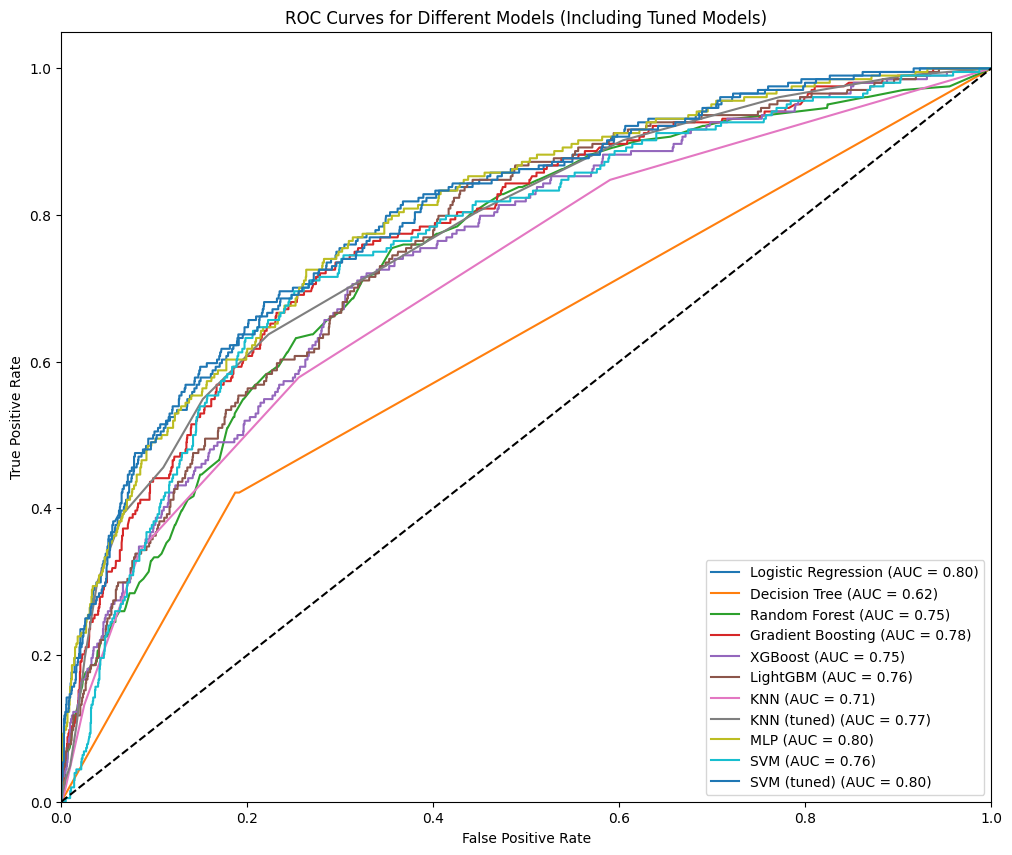


Best Performing Models:
--------------------------------------------------
Best Accuracy: SVM (0.9113)
Best Precision: KNN (tuned) (0.4296)
Best Recall: Decision Tree (0.4216)
Best AUC: Logistic Regression (0.8005)

KNN Improvement from Tuning:
AUC Improvement: 0.0609

SVM Improvement from Tuning:
AUC Improvement: 0.0355


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the structure you provided
# Note: I'll assume categorical variables like 'Gender' are already encoded numerically

# Pre-tuned parameters
KNNp = {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
svmp = {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

# Scale features (important for SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'KNN (tuned)': KNeighborsClassifier(**KNNp),
    'MLP': MLPClassifier(random_state=42, max_iter=1000),
    'SVM': SVC(probability=True, random_state=42),
    'SVM (tuned)': SVC(probability=True, random_state=42, **svmp)
}

# Dictionary to store results
results = {}
y_pred_dict = {}
y_prob_dict = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    try:

        if 'SVM (tuned)' in name or 'KNN' in name:
            X_tr = X_train_scaled
            X_te = X_test_scaled
        else:
            X_tr = X_train
            X_te = X_test


        # Fit the model
        model.fit(X_tr, y_train)

        # Make predictions
        y_pred = model.predict(X_te)
        y_prob = model.predict_proba(X_te)[:, 1]  # Probability for positive class

        # Store predictions
        y_pred_dict[name] = y_pred
        y_prob_dict[name] = y_prob

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Store results
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'Confusion Matrix': conf_matrix,
            'AUC': roc_auc,
            'fpr': fpr,
            'tpr': tpr
        }
    except Exception as e:
        print(f"Error with {name}: {str(e)}")
        results[name] = None

# Print results
print("\nPerformance Metrics:")
print("-" * 50)
for name, metrics in results.items():
    if metrics is not None:
        print(f"\n{name}:")
        print(f"Accuracy: {metrics['Accuracy']:.4f}")
        print(f"Precision: {metrics['Precision']:.4f}")
        print(f"Recall: {metrics['Recall']:.4f}")
        print(f"AUC Score: {metrics['AUC']:.4f}")
        print("Confusion Matrix:")
        print(metrics['Confusion Matrix'])

# Plot ROC curves
plt.figure(figsize=(12, 10))
for name, metrics in results.items():
    if metrics is not None:
        plt.plot(metrics['fpr'], metrics['tpr'], label=f'{name} (AUC = {metrics["AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models (Including Tuned Models)')
plt.legend(loc="lower right")
plt.show()

# Find best performing model for each metric
metrics_to_compare = ['Accuracy', 'Precision', 'Recall', 'AUC']
best_models = {}

for metric in metrics_to_compare:
    valid_models = {k: v for k, v in results.items() if v is not None}
    best_model = max(valid_models.items(), key=lambda x: x[1][metric])
    best_models[metric] = (best_model[0], best_model[1][metric])

print("\nBest Performing Models:")
print("-" * 50)
for metric, (model_name, value) in best_models.items():
    print(f"Best {metric}: {model_name} ({value:.4f})")

# Compare tuned vs untuned versions
if 'KNN' in results and 'KNN (tuned)' in results:
    print("\nKNN Improvement from Tuning:")
    print(f"AUC Improvement: {results['KNN (tuned)']['AUC'] - results['KNN']['AUC']:.4f}")

if 'SVM' in results and 'SVM (tuned)' in results:
    print("\nSVM Improvement from Tuning:")
    print(f"AUC Improvement: {results['SVM (tuned)']['AUC'] - results['SVM']['AUC']:.4f}")